In [225]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

In [226]:
df1=pd.read_csv("Tesla file.csv")
df1

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [227]:
df1.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [228]:
df1.shape

(1692, 7)

In [229]:
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [231]:
#so there are no zero values or NA

In [232]:
#EDA Exploratory Data Analysis

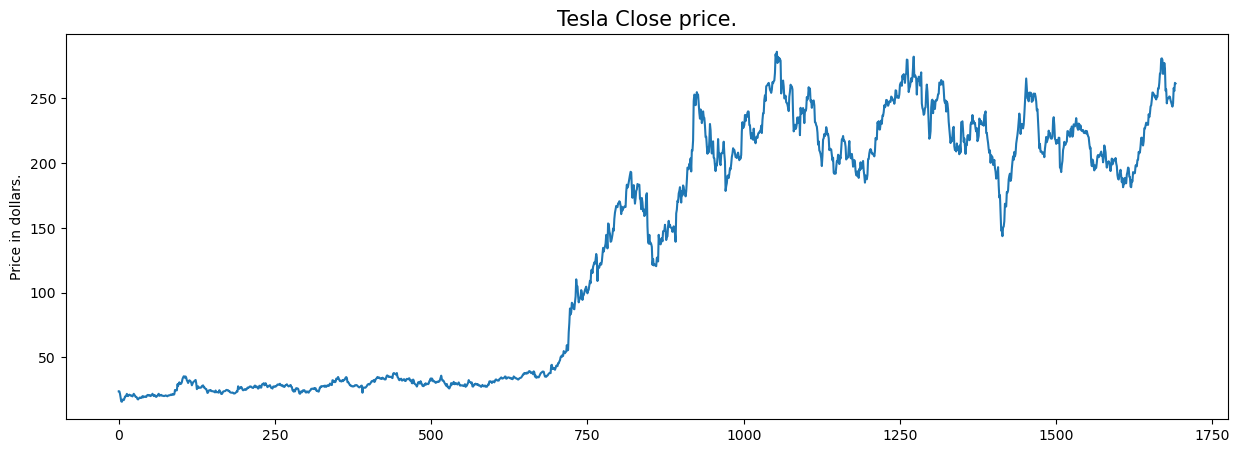

In [233]:
plt.figure(figsize=(15,5))
plt.plot(df1["Close"])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [234]:
#It is obvious there is an increase trend in "Close Price"

In [235]:
#Furthermore it looks that Close and Adj Close have the same data --> In that
#case we have redundant data which means we need to drop


In [236]:
df2=df1.drop(['Adj Close'], axis=1)
df2

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400


<Axes: ylabel='Frequency'>

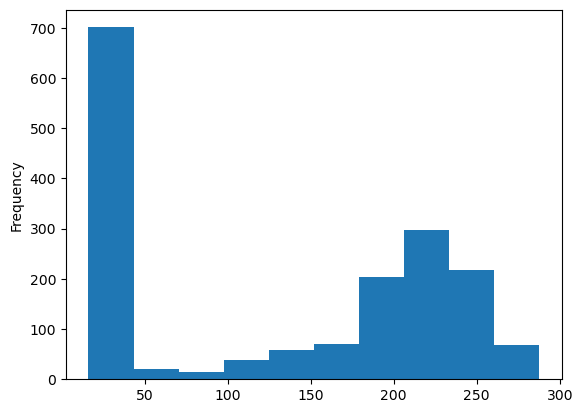

In [237]:
df2['Open'].plot(kind='hist')

<Axes: ylabel='Frequency'>

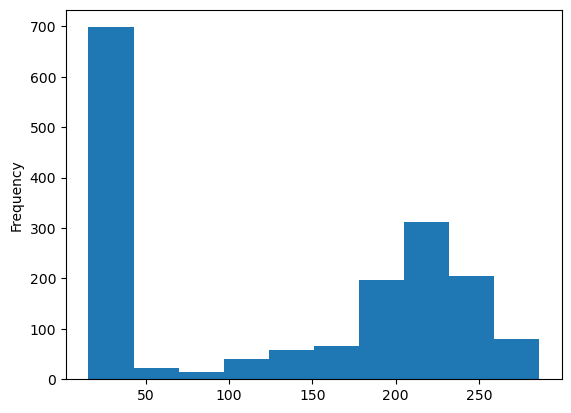

In [238]:
df2['Close'].plot(kind='hist')

<Axes: ylabel='Frequency'>

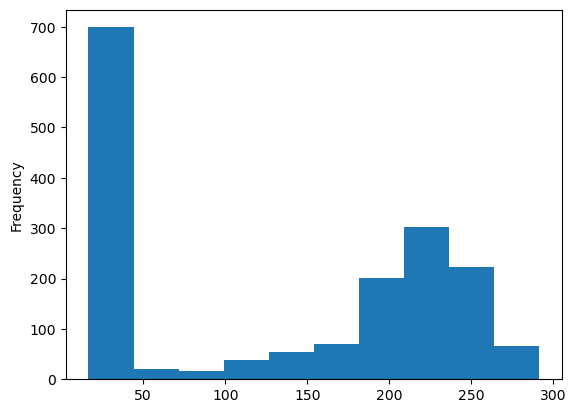

In [239]:
df2['High'].plot(kind='hist')

<Axes: ylabel='Frequency'>

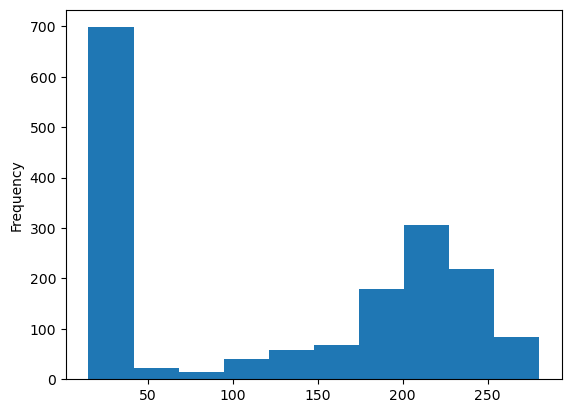

In [240]:
df2['Low'].plot(kind='hist')

<Axes: ylabel='Frequency'>

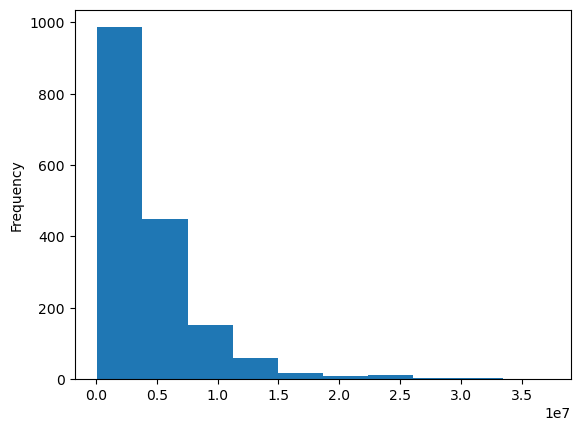

In [241]:
df2['Volume'].plot(kind='hist')

In [242]:
#The "Volume" seems to have a left skew and all the other parameters showed 2 different peaks

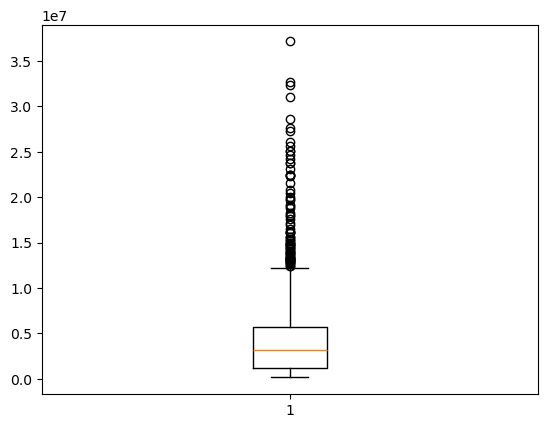

In [243]:
plt.boxplot(df2["Volume"])
plt.show()

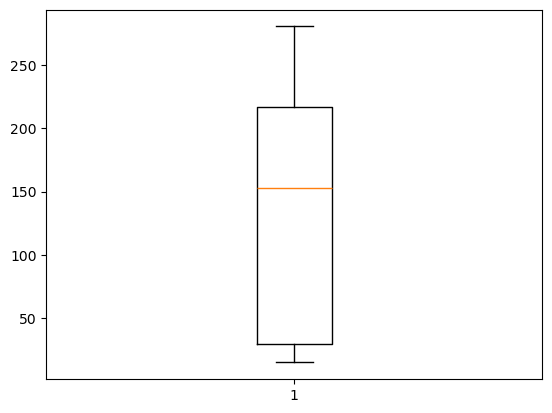

In [244]:
plt.boxplot(df2["Low"])
plt.show()

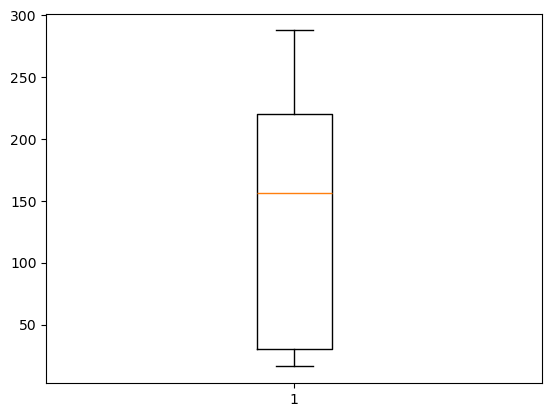

In [245]:
plt.boxplot(df2["Open"])
plt.show()

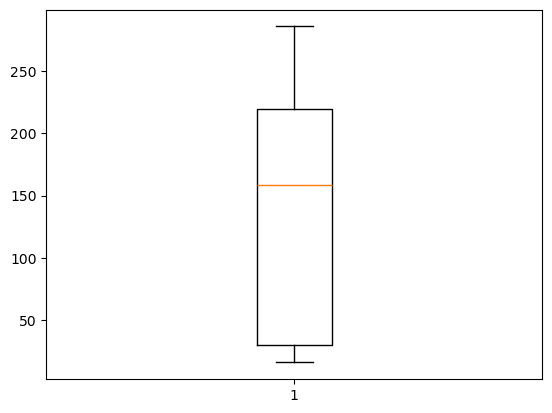

In [246]:
plt.boxplot(df2["Close"])
plt.show()

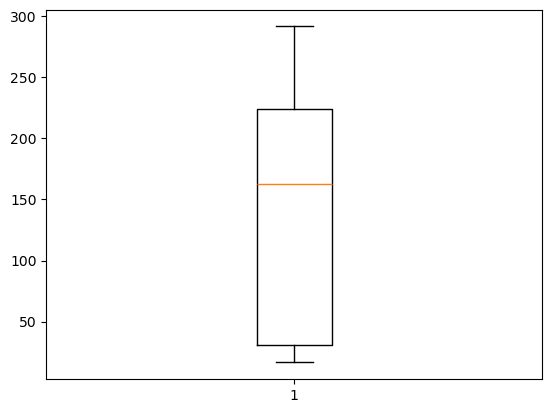

In [247]:
plt.boxplot(df2["High"])
plt.show()

In [248]:
#Only the "volume" has outliers

In [249]:
datesplit=df2["Date"].str.split("/", expand=True)
df2['day']=datesplit[1].astype('int')
df2['month']=datesplit[0].astype('int')
df2['year']=datesplit[2].astype('int')
df2.head()


,Date,Open,High,Low,Close,Volume,day,month,year
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


In [250]:
#In order to evaluate the profit or the sales usually companies look the quarters of the years

In [251]:
df2['quarter']=np.where(df2['month']%3==0,1,0)
df2.head()

,Date,Open,High,Low,Close,Volume,day,month,year,quarter
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [252]:
df3=df2.drop(['Date'], axis=1)
df3

,Open,High,Low,Close,Volume,day,month,year,quarter
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0
...,...,...,...,...,...,...,...,...,...
1687,244.820007,246.850006,242.779999,246.169998,3010700,13,3,2017,1
1688,246.110001,258.119995,246.020004,258.000000,7575500,14,3,2017,1
1689,257.000000,261.000000,254.270004,255.729996,4816600,15,3,2017,1
1690,262.399994,265.750000,259.059998,262.049988,7100400,16,3,2017,1


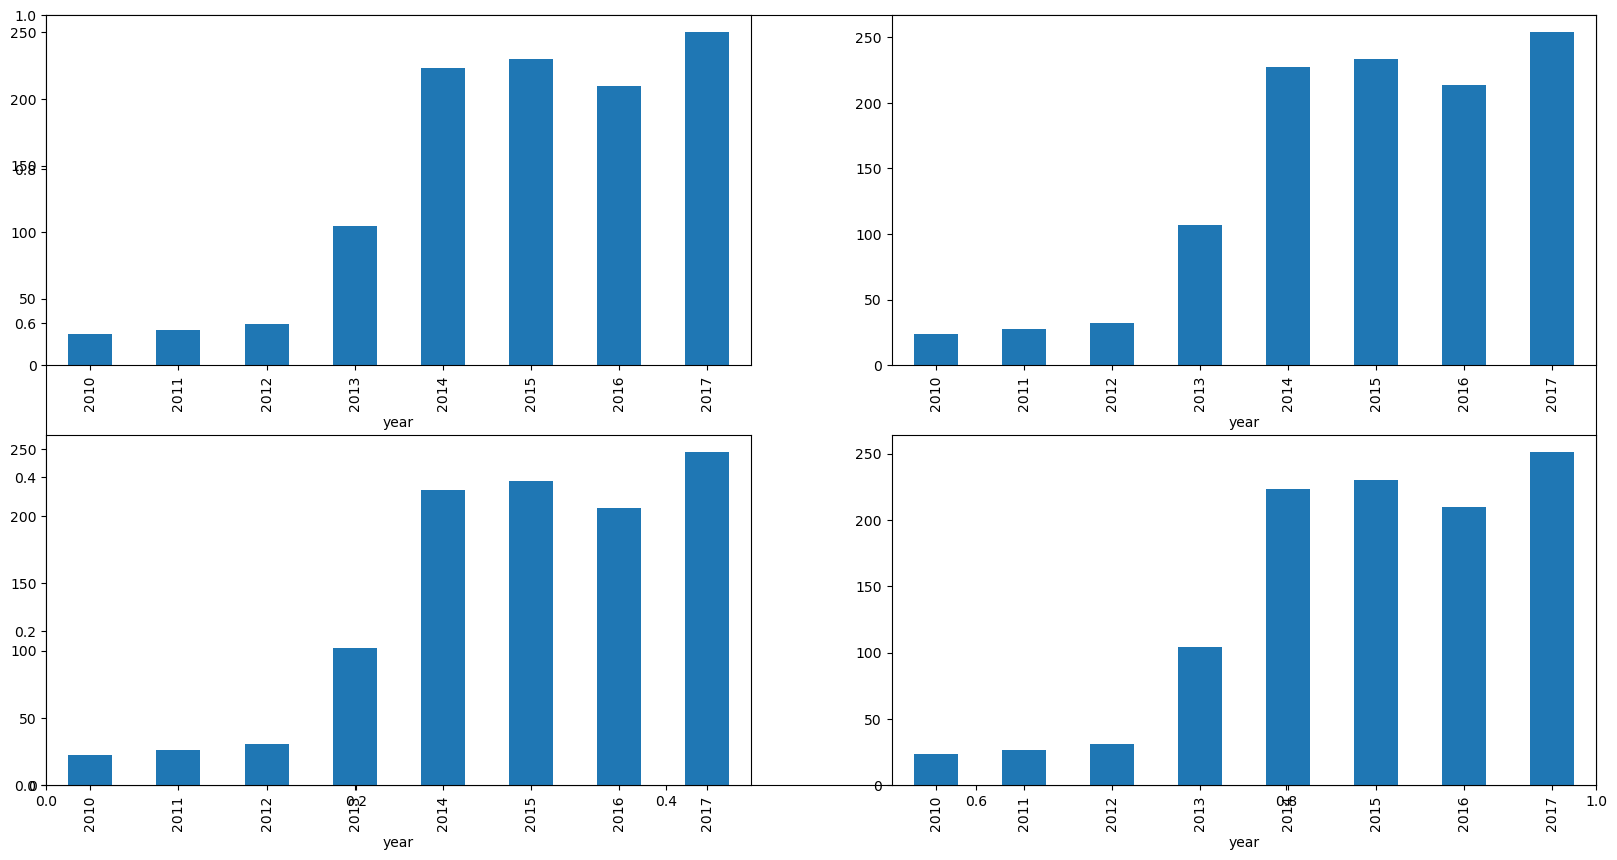

In [253]:
data_grouped = df3.groupby('year').mean() 
plt.subplots(figsize=(20,10)) 
  
for i, col in enumerate(['Open', 'High', 'Low', 'Close']): 
  plt.subplot(2,2,i+1) 
  data_grouped[col].plot.bar() 
plt.show()

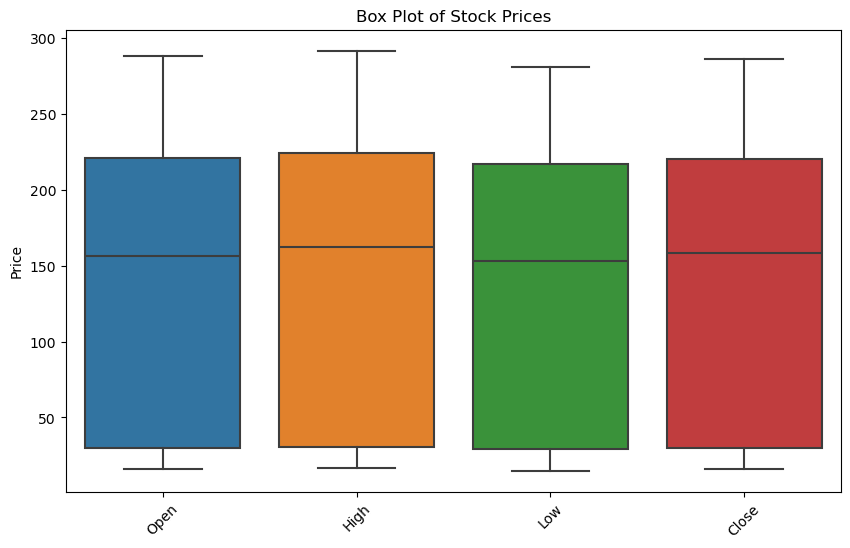

In [254]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df3[['Open', 'High', 'Low', 'Close']], orient = 'v')
plt.title("Box Plot of Stock Prices")
plt.ylabel("Price")
plt.xticks(rotation = 45)
plt.show()

In [255]:
df3.groupby('quarter').mean()

,Open,High,Low,Close,Volume,day,month,year
quarter,,,,,,,,
0,130.813739,133.182620,128.257229,130.797709,4.461581e+06,15.686501,6.141208,2013.353464
1,135.679982,137.927032,133.455777,135.673269,3.891084e+06,15.657244,7.584806,2013.314488


In [256]:
#When it comes to end of a quarter the prices are higher, however when it comes to the amount of stocks, we see that higher rates are not encountered in end of quarter

In [257]:
df3['open-close']  = df3['Open'] - df3['Close'] 
df3['low-high']  = df3['Low'] - df3['High'] 
df3['target'] = np.where(df3['Close'].shift(-1) > df3['Close'], 1, 0)

In [258]:
df3


,Open,High,Low,Close,Volume,day,month,year,quarter,open-close,low-high,target
0,19.000000,25.000000,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,25.790001,30.420000,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,25.000000,25.920000,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,23.000000,23.100000,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,20.000000,20.000000,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1687,244.820007,246.850006,242.779999,246.169998,3010700,13,3,2017,1,-1.349991,-4.070007,1
1688,246.110001,258.119995,246.020004,258.000000,7575500,14,3,2017,1,-11.889999,-12.099991,0
1689,257.000000,261.000000,254.270004,255.729996,4816600,15,3,2017,1,1.270004,-6.729996,1
1690,262.399994,265.750000,259.059998,262.049988,7100400,16,3,2017,1,0.350006,-6.690002,0


In [259]:
df3[23:41]

,Open,High,Low,Close,Volume,day,month,year,quarter,open-close,low-high,target
23,20.500000,20.969999,20.330000,20.920000,718100,2,8,2010,0,-0.420000,-0.639999,1
24,21.000000,21.950001,20.820000,21.950001,1230500,3,8,2010,0,-0.950001,-1.130001,0
25,21.950001,22.180000,20.850000,21.260000,913000,4,8,2010,0,0.690001,-1.330000,0
26,21.540001,21.549999,20.049999,20.450001,796200,5,8,2010,0,1.090000,-1.500000,0
27,20.100000,20.160000,19.520000,19.590000,741900,6,8,2010,0,0.510000,-0.640000,1
28,19.900000,19.980000,19.450001,19.600000,812700,9,8,2010,0,0.300000,-0.529999,0
29,19.650000,19.650000,18.820000,19.030001,1281300,10,8,2010,0,0.619999,-0.830000,0
30,18.690001,18.879999,17.850000,17.900000,797600,11,8,2010,0,0.790001,-1.029999,0
31,17.799999,17.900000,17.389999,17.600000,691000,12,8,2010,0,0.199999,-0.510001,1
32,18.180000,18.450001,17.660000,18.320000,634000,13,8,2010,0,-0.140000,-0.790001,1


In [260]:
#Since we have already set up a target, we need to see how balanced or imbalanced is the data

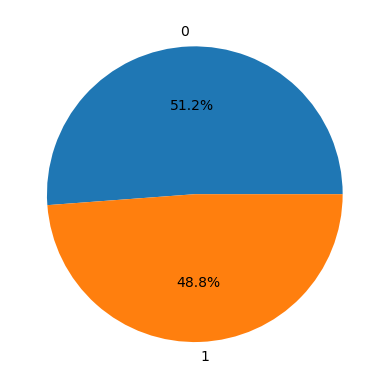

In [261]:
plt.pie(df3['target'].value_counts().values,  
        labels=[0, 1], autopct='%1.1f%%') 
plt.show()

<Axes: >

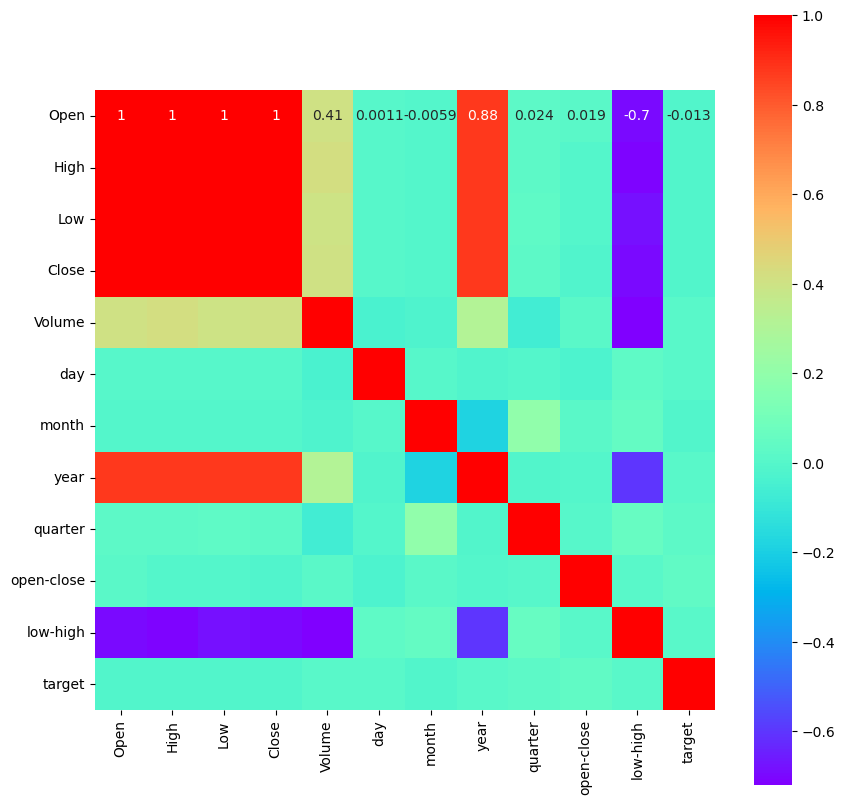

In [262]:
corelation=df3.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation, vmax=1, square=True , annot=True, cmap='rainbow')

In [263]:
#We need to normalize the data and further separate it in training and test set

In [264]:
df4 = df3[['open-close', 'low-high', 'quarter']] 
target = df3['target'] 

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler() 
df4 = scaler.fit_transform(df4) 
  
X_train, X_test, Y_train, Y_test = train_test_split( 
    df4, target, test_size=0.2, random_state=0) 
print(X_train.shape, X_valid.shape)

(1353, 3) (339, 3)


In [265]:
df4

array([[-1.32794273, -0.66020389,  1.41046067],
       [ 0.52736418, -0.57665057,  1.41046067],
       [ 0.81987972, -0.21540295, -0.70898822],
       ...,
       [ 0.34048006, -0.4808082 ,  1.41046067],
       [ 0.0913007 , -0.47097981,  1.41046067],
       [ 0.67362168,  0.15813788,  1.41046067]])

In [266]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [267]:
import xgboost as xgb

In [268]:
from xgboost import XGBClassifier 

In [269]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
 
from sklearn import metrics 
from sklearn.metrics import accuracy_score  
import warnings 
warnings.filterwarnings('ignore')

In [270]:
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, Y_train) 

LogisticRegression(random_state=0)

In [271]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [272]:
from sklearn.metrics import confusion_matrix,classification_report

In [273]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test,y_pred) 
print(cm)

[[ 31 134]
 [ 37 137]]


In [274]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.19      0.27       165
           1       0.51      0.79      0.62       174

    accuracy                           0.50       339
   macro avg       0.48      0.49      0.44       339
weighted avg       0.48      0.50      0.45       339



In [275]:
#Let's try the SVC

In [276]:
model=SVC()
model.fit(X_train,Y_train)
ypred1=model.predict(X_test)
ypred1

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [277]:
print (classification_report(Y_test,ypred1))

              precision    recall  f1-score   support

           0       0.45      0.18      0.25       165
           1       0.50      0.79      0.62       174

    accuracy                           0.49       339
   macro avg       0.47      0.48      0.43       339
weighted avg       0.48      0.49      0.44       339



In [278]:
#Let's try now the XGBoost classifier

In [279]:
clf= XGBClassifier()

In [280]:
clf.fit(X_train,Y_train)
ypred2=clf.predict(X_test)
ypred2

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [282]:
print(classification_report(Y_test,ypred2))

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       165
           1       0.52      0.51      0.52       174

    accuracy                           0.51       339
   macro avg       0.51      0.51      0.51       339
weighted avg       0.51      0.51      0.51       339



In [283]:
#So as we can see all the models have not great accuracy score with these models! SO perhaps we might have if we use more complex models! 
#Probably the Tensfor flow and the Deep learning models will give us the answer! When I am more experienced with that I will come back to test these models and see how DL will change accuracy!